<a href="https://colab.research.google.com/github/yeffrimic/14digittimestampToUTCtimestampConverterPython/blob/master/proyecto_electricidad_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de electricidad
El proyecto consiste en una calculadora didactica hecha en python para poder hacer calculos de capacitancia, impedancia y poder ver la grafica senoidal basada en los parametros que se piden. 


## calculdadora de capacitancia


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
formatter = mpl.ticker.EngFormatter()

In [ ]:
a = float(input("ingrese el area en metros cuadrados: "))
er = float(input("ingrese la dielectrico (0 para default): "))
d = float(input("ingrese la distancia en metros: "))
k =  8.854e-12
if(er ==0):
  er  = 1
c = (er*k)*(a/d)
h = formatter(c) +"F"
print(h)

ingrese el area en metros cuadrados: 0.57E-3
ingrese la dielectrico (0 para default): 1.0006
ingrese la distancia en metros: 0.1E-3
50.4981 pF


## Calculadora inductancia


In [ ]:
radio = float(input("ingrese el radio de la bobina en m : "))
area = math.pi * (radio**2)
longitud = float(input("ingrese la longitud en m: "))
numVueltas = float(input("ingrese numero de vueltas: "))
perm =1.26e-6
relativPerm = float(input("ingrese permeabilidad relativa (default 1): "))
inductancia = 0
if(relativPerm <1):
  print("ingrese una permeabilidad relativa mayor a 0 ")
else:
  inductancia = (relativPerm * perm * (numVueltas**2) * area )/ longitud # (uk * uR * num^2 * a) /l
  print(formatter(inductancia) + "H")


ingrese el radio de la bobina en m : 5E-3
ingrese la longitud en m: 0.05
ingrese numero de vueltas: 200
ingrese permeabilidad relativa (default 1): 1.0006
79.2156 µH


## Grafica


ingrese la amplitud en v: 40
ingrese la frecuencia : 1000
ingrese fase: 180
ingrese tiempo de muestreo: 0.009


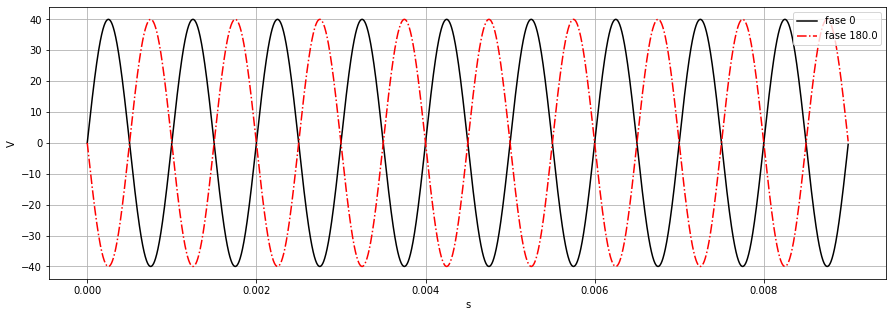

In [ ]:
def sin_wave(A, f, fs, phi, t):
    '''
    : Params A: Amplitud
         : params F: Frecuencia de señal
         : Params FS: Frecuencia de muestreo
         : Params phi: fase
         : params t: longitud de tiempo
    '''
    # Si la longitud de la serie de tiempo es T = 1S, 
    # Frecuencia de muestreo FS = 1000 Hz, intervalo de tiempo de muestreo TS = 1 / FS = 0.001S
    # Para los puntos de muestreo de la secuencia de tiempo es n = t / t ts = 1 / 0,001 = 1000, hay 1000 puntos, cada intervalo de punto es TS
    Ts = 1/fs
    n = t / Ts
    n = np.arange(n)
    y = A*np.sin(2*np.pi*f*n*Ts + phi*(np.pi/180))
    return y


    # f=50 hz
a =float(input("ingrese la amplitud en v: "))
f =float(input("ingrese la frecuencia : "))
fs =500000

fase =float(input("ingrese fase: "))
t =float(input("ingrese tiempo de muestreo: "))
usuario = sin_wave(a, f, fs, fase, t)
normal = sin_wave(a, f, fs, 0, t)
x = np.arange(0, t, 1/fs)
plt.figure(figsize=(15,5))
plt.xlabel('s')
plt.ylabel('V')
plt.grid()
plt.plot(x, normal, 'k')
plt.plot(x, usuario, 'r-.')
plt.legend(['fase 0', 'fase '+str(fase), 'phase 60', 'phase 90'], loc=1)
plt.show()